<a href="https://colab.research.google.com/github/sanashk19/Sana_PriceOptima/blob/main/Sana_PriceOptima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
dataset= pd.read_csv('/content/drive/MyDrive/dynamic_pricing.csv')
dataset.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [2]:
dataset.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [3]:
dataset.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


In [4]:
dataset.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [5]:
dataset.shape

(1000, 10)

In [6]:
dataset.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [7]:
dataset.nunique()

,0
Number_of_Riders,81
Number_of_Drivers,79
Location_Category,3
Customer_Loyalty_Status,3
Number_of_Past_Rides,101
Average_Ratings,151
Time_of_Booking,4
Vehicle_Type,2
Expected_Ride_Duration,171
Historical_Cost_of_Ride,1000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [9]:
print("Duplicates:", dataset.duplicated().sum())
dataset = dataset.drop_duplicates()

Duplicates: 0


In [18]:
#Handling missing values
for col in dataset.columns:
    if dataset[col].dtype in ['int64', 'float64']:   # numeric
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:                                            # categorical
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
print("Missing values per column after preprocessing:")
print(dataset.isnull().sum())


Missing values per column after preprocessing:
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
Completed_Rides            0
Cost_per_Ride              0
Recommended_Price          0
Revenue                    0
Profit                     0
Price_Change_%             0
Cancellation_Rate_%        0
dtype: int64


In [21]:
#Categorical encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = le.fit_transform(dataset[col])
#Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

In [22]:
print(dataset.head())

   Number_of_Riders  Number_of_Drivers  Location_Category  \
0          1.250673           0.940457                  2   
1         -0.100128           0.625642                  1   
2         -0.775528           0.205889                  0   
3          1.208460           0.048482                  0   
4          0.744122          -0.266334                  0   

   Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                        2             -1.263895         0.488517   
1                        2              0.749818        -0.452793   
2                        2             -1.707594        -0.613505   
3                        1              0.579164         0.121177   
4                        1              0.818079        -1.118598   

   Time_of_Booking  Vehicle_Type  Expected_Ride_Duration  \
0                3             1               -0.195113   
1                1             0               -1.151547   
2                0             1      

In [23]:
import numpy as np

# Function to detect outliers using IQR
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)   # 25th percentile
    Q3 = data[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                   # Interquartile range

    lower = Q1 - 1.5 * IQR           # Lower bound
    upper = Q3 + 1.5 * IQR           # Upper bound

    # Outliers are those outside the bounds
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    return outliers, lower, upper

# Apply to all numerical columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers, lower, upper = find_outliers_iqr(dataset, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}")

    # Show example outlier values
    if not outliers.empty:
        print("Example Outliers:\n", outliers[[col]].head())


Column: Number_of_Riders
Lower Bound: -3.456023739797964, Upper Bound: 3.4668301458633866
Number of Outliers: 0

Column: Number_of_Drivers
Lower Bound: -2.9684959941497877, Upper Bound: 2.6981748091621656
Number of Outliers: 10
Example Outliers:
      Number_of_Drivers
42            2.829348
53            2.986755
140           2.776879
294           2.776879
663           3.144163

Column: Location_Category
Lower Bound: -3.0, Upper Bound: 5.0
Number of Outliers: 0

Column: Customer_Loyalty_Status
Lower Bound: -3.0, Upper Bound: 5.0
Number of Outliers: 0

Column: Number_of_Past_Rides
Lower Bound: -3.4141306272210254, Upper Bound: 3.4120145222246974
Number of Outliers: 0

Column: Average_Ratings
Lower Bound: -3.5149225793040944, Upper Bound: 3.487509778532758
Number of Outliers: 0

Column: Time_of_Booking
Lower Bound: -2.0, Upper Bound: 6.0
Number of Outliers: 0

Column: Vehicle_Type
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 0

Column: Expected_Ride_Duration
Lower Bound: 

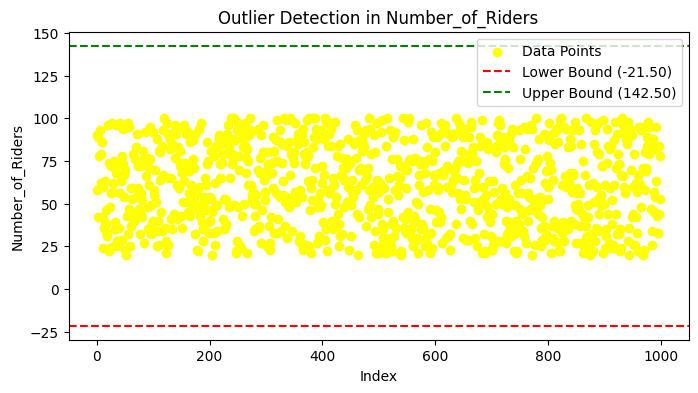

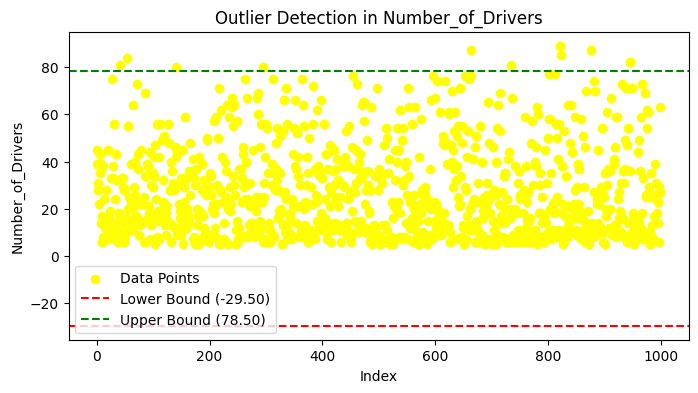

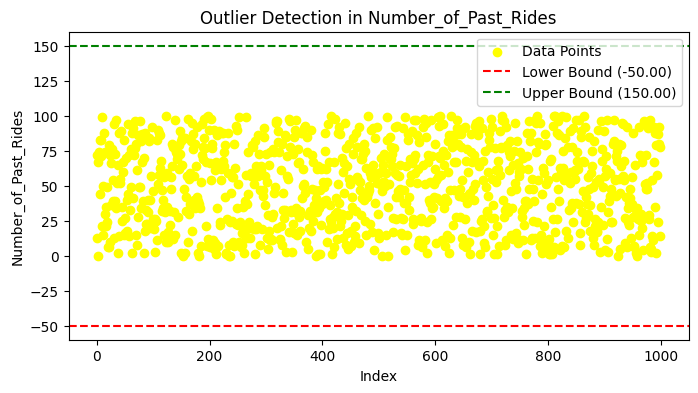

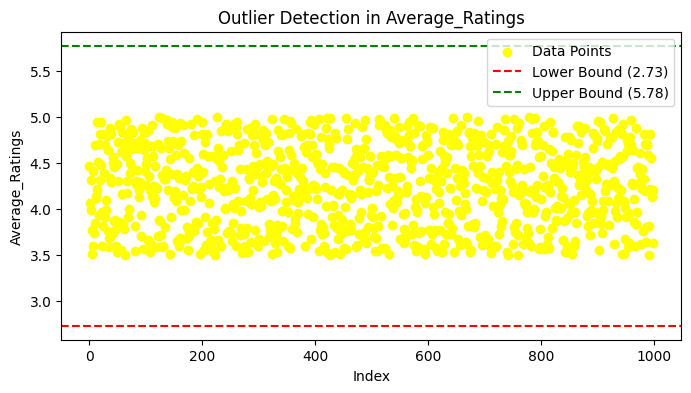

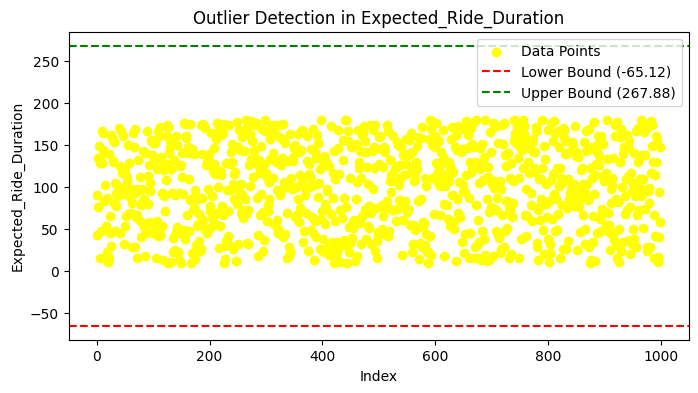

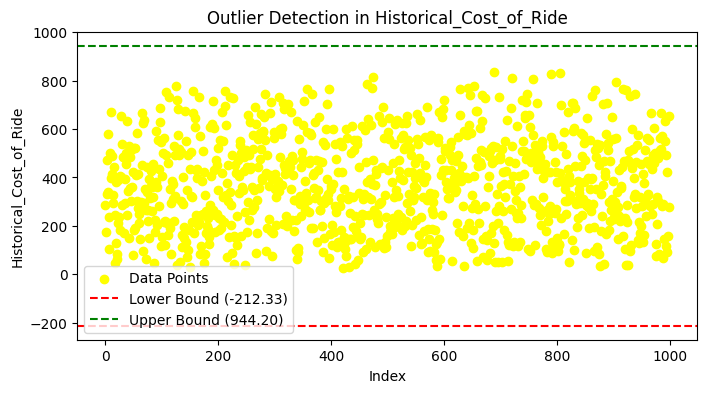

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to detect and plot outliers
def plot_outliers_with_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    # Plot
    plt.figure(figsize=(8, 4))
    plt.scatter(data.index, data[col], color='yellow', label='Data Points')

    # Outlier bounds
    plt.axhline(y=lower, color='red', linestyle='--', label=f'Lower Bound ({lower:.2f})')
    plt.axhline(y=upper, color='green', linestyle='--', label=f'Upper Bound ({upper:.2f})')

    plt.title(f"Outlier Detection in {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend()
    plt.show()

# Apply to all numeric columns
for col in dataset.select_dtypes(include=np.number).columns:
    plot_outliers_with_iqr(dataset, col)


In [24]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/dynamic_pricing.csv")

#Assumptions
# Completed rides = min(Riders, Drivers)
dataset["Completed_Rides"] = dataset[["Number_of_Riders", "Number_of_Drivers"]].min(axis=1)

# Cost assumption (70% of historical cost = driver payout + fuel + fees)
dataset["Cost_per_Ride"] = 0.7 * dataset["Historical_Cost_of_Ride"]

# Recommended Price (scenario: +10% increase)
dataset["Recommended_Price"] = dataset["Historical_Cost_of_Ride"] * 1.10

# 1.Revenue
baseline_revenue = (dataset["Historical_Cost_of_Ride"] * dataset["Completed_Rides"]).sum()
recommended_revenue = (dataset["Recommended_Price"] * dataset["Completed_Rides"]).sum()
dataset["Revenue"] = dataset["Historical_Cost_of_Ride"] * dataset["Completed_Rides"]

# 2.Profit
dataset["Profit"] = (dataset["Historical_Cost_of_Ride"] - dataset["Cost_per_Ride"]) * dataset["Completed_Rides"]

# 3.Revenue Lift (%)
Revenue_lift = ((recommended_revenue - baseline_revenue) / baseline_revenue) * 100
if baseline_revenue == 0:
    Revenue_lift = np.nan

# 4.Gross Margin (%)
Gross_margin = (dataset["Profit"].sum() / baseline_revenue) * 100

# 5.Conversion Rate (%)
total_riders = dataset["Number_of_Riders"].sum()
total_completed = dataset["Completed_Rides"].sum()
Conversion_rate = (total_completed / total_riders) * 100 if total_riders > 0 else np.nan

# 6.Price Change Rate (%)
dataset["Price_Change_%"] = dataset["Historical_Cost_of_Ride"].pct_change().abs() * 100
dataset["Price_Change_%"] = dataset["Price_Change_%"].fillna(0)
Price_change_rate = dataset["Price_Change_%"].mean()

# 7.Cancellation Rate (%)
dataset["Cancellation_Rate_%"] = ((dataset["Number_of_Riders"] - dataset["Completed_Rides"]) / dataset["Number_of_Riders"]) * 100
Cancellation_rate = dataset["Cancellation_Rate_%"].mean()

results = {
    "Revenue (Baseline)": round(baseline_revenue, 2),
    "Revenue (Scenario +10% Price)": round(recommended_revenue, 2),
    "Revenue Lift %": round(Revenue_lift, 2),
    "Profit Total": round(dataset["Profit"].sum(), 2),
    "Gross Margin %": round(Gross_margin, 2),
    "Conversion Rate %": round(Conversion_rate, 2),
    "Avg Price Change %": round(Price_change_rate, 2),
    "Cancellation Rate %": round(Cancellation_rate, 2),
}
print("Aggregate KPI Summary")
for k, v in results.items():
    print(f"{k}: {v}")

Aggregate KPI Summary
Revenue (Baseline): 10146781.38
Revenue (Scenario +10% Price): 11161459.52
Revenue Lift %: 10.0
Profit Total: 3044034.41
Gross Margin %: 30.0
Conversion Rate %: 44.85
Avg Price Change %: 99.79
Cancellation Rate %: 56.18


In [25]:
dataset.shape

(1000, 17)

In [26]:
dataset.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Completed_Rides,Cost_per_Ride,Recommended_Price,Revenue,Profit,Price_Change_%,Cancellation_Rate_%
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,45,198.980091,312.683000,12791.577286,3837.473186,0.000000,50.000000
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,39,121.712327,191.262228,6781.115357,2034.334607,38.831907,32.758621
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,31,230.856828,362.775016,10223.659538,3067.097861,89.674156,26.190476
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,28,329.140862,517.221355,13165.634489,3949.690347,42.573588,68.539326
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,22,405.776996,637.649565,12752.991292,3825.897388,23.283689,71.794872
